# The McCullouch-Pitts Neuron Model

Implementation of the McCullouch-Pitts Neuron (MP) Neuron model using python and numpy that takes binary inputs (which can be both excitatory and inhibitory) and produces a binary output.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# MP Neuron Model with Inhibitory Input Support
def mp_neuron(inputs, threshold, inhibitory_indices=[]):
  net_input = np.sum(inputs)
  for idx in inhibitory_indices:
    if inputs[idx] >= 0.5:
      return 0
  return 1 if net_input >= threshold else 0

# Boolean Functions using MP-Neuron Model

Implementing AND with two inputs, OR with two inputs and NOT with inhibitory input.

In [3]:
# Boolean Functions
## AND Function
def and_function(x1, x2):
  return mp_neuron(np.array([x1, x2]), 2)

## OR Function
def or_function(x1, x2):
  return mp_neuron(np.array([x1, x2]), 1)

## NOT Function using inhibitory input
def not_function(x1):
  return mp_neuron(np.array([x1]), -np.inf, inhibitory_indices=[0])

# Verification

Verifying the MP-neuron model with test cases.

In [4]:
# AND

inputs_AND = [[0, 0], [0, 1], [1, 0], [1, 1]]
ground_truth_AND = [0, 0, 0, 1]

outputs_AND = []
for i in range(len(inputs_AND)):
  input = inputs_AND[i]
  outputs_AND.append(and_function(input[0], input[1]))

print("Inputs for AND")
print(inputs_AND)
print("Ground Truth for AND")
print(ground_truth_AND)
print("Outputs for AND")
print(outputs_AND)

Inputs for AND
[[0, 0], [0, 1], [1, 0], [1, 1]]
Ground Truth for AND
[0, 0, 0, 1]
Outputs for AND
[0, 0, 0, 1]


In [5]:
# OR

inputs_OR = [[0, 0], [0, 1], [1, 0], [1, 1]]
ground_truth_OR = [0, 1, 1, 1]

outputs_OR = []
for i in range(len(inputs_OR)):
  input = inputs_OR[i]
  outputs_OR.append(or_function(input[0], input[1]))

print("Inputs for OR")
print(inputs_OR)
print("Ground Truth for OR")
print(ground_truth_OR)
print("Outputs for OR")
print(outputs_OR)

Inputs for OR
[[0, 0], [0, 1], [1, 0], [1, 1]]
Ground Truth for OR
[0, 1, 1, 1]
Outputs for OR
[0, 1, 1, 1]


In [5]:
# NOT

inputs_NOT = [0, 1]
ground_truth_NOT = [1, 0]

outputs_NOT = []
for i in range(len(inputs_NOT)):
  input = inputs_NOT[i]
  outputs_NOT.append(not_function(input))

print("Inputs for NOT")
print(inputs_NOT)
print("Ground Truth for NOT")
print(ground_truth_NOT)
print("Outputs for NOT")
print(outputs_NOT)

Inputs for NOT
[0, 1]
Ground Truth for NOT
[1, 0]
Outputs for NOT
[1, 0]


# Displaying Decision Boundaries
Implementing the display of decision boundaries of boolean functions using sklearn's DecisionBoundaryDisplay

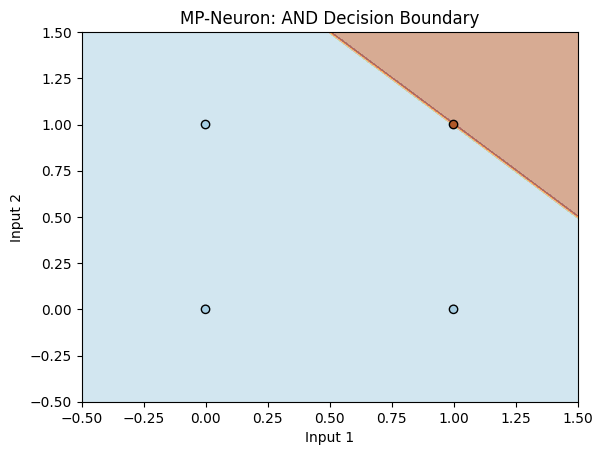

In [6]:
# AND

inputs_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_AND = np.array([and_function(x[0], x[1]) for x in inputs_AND])

# Generate grid points for decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = np.array([and_function(xi, yi) for xi, yi in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary using DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=Z)
disp.plot(cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(inputs_AND[:, 0], inputs_AND[:, 1], c=outputs_AND, edgecolor="k", cmap=plt.cm.Paired)
plt.title("MP-Neuron: AND Decision Boundary")
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

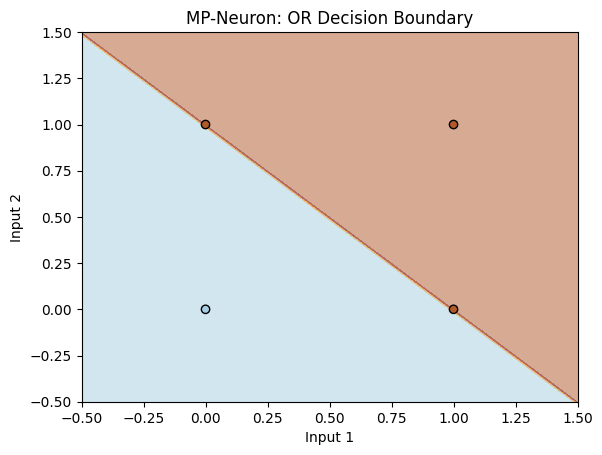

In [7]:
# OR

inputs_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_OR = np.array([or_function(x[0], x[1]) for x in inputs_OR])

# Generate grid points for decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = np.array([or_function(xi, yi) for xi, yi in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary using DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=Z)
disp.plot(cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(inputs_OR[:, 0], inputs_OR[:, 1], c=outputs_OR, edgecolor="k", cmap=plt.cm.Paired)
plt.title("MP-Neuron: OR Decision Boundary")
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

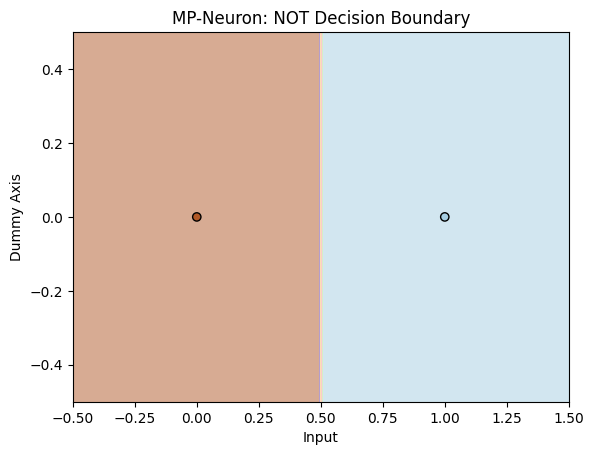

In [8]:
# NOT

inputs_NOT = np.array([0, 1])
outputs_NOT = np.array([not_function(x) for x in inputs_NOT])

# Generate grid points for decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 0.5, 100))
Z = np.array([not_function(xi) for xi in xx.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary using DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=Z)
disp.plot(cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(inputs_NOT, [0] * len(inputs_NOT), c=outputs_NOT, edgecolor="k", cmap=plt.cm.Paired)
plt.title("MP-Neuron: NOT Decision Boundary")
plt.xlabel('Input')
plt.ylabel('Dummy Axis')
plt.show()

# Observations from NOT Decision Boundary Plot

* Threshold is set to a large negative value in NOT gate only for visual purposes.
* The function is written to handle binary inputs, however due to the conditions used in defining the inhibitory inputs, the decision boundary appears at 0.5 value.